In [2]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [10]:
X = dataset[:,0:10]
Y = dataset[:,10]


In [6]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [13]:
from keras.models import Sequential
from keras.layers import Dense


2022-02-15 15:56:02.500223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-15 15:56:02.500247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100


2022-02-15 15:56:05.167452: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-15 15:56:05.167479: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-15 15:56:05.167495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Z238-UL): /proc/driver/nvidia/version does not exist
2022-02-15 15:56:05.167686: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


32/32 [==============================] - 1s 6ms/step - loss: 0.7006 - accuracy: 0.4971 - val_loss: 0.6871 - val_accuracy: 0.5434
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.4951 - val_loss: 0.6819 - val_accuracy: 0.5434
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.4922 - val_loss: 0.6776 - val_accuracy: 0.5890
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.6331 - val_loss: 0.6732 - val_accuracy: 0.6986
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6820 - val_loss: 0.6687 - val_accuracy: 0.7123
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.7025 - val_loss: 0.6643 - val_accuracy: 0.7215
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.7172 - val_loss: 0.6604 - val_accuracy: 0.7215
Epoch 8/100
32/32 [======

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8708 - val_loss: 0.3675 - val_accuracy: 0.8356
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8699 - val_loss: 0.3642 - val_accuracy: 0.8356
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8757 - val_loss: 0.3637 - val_accuracy: 0.8356
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8718 - val_loss: 0.3618 - val_accuracy: 0.8402
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8728 - val_loss: 0.3597 - val_accuracy: 0.8356
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8777 - val_loss: 0.3570 - val_accuracy: 0.8311
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8757 - val_loss: 0.3559 - val_accuracy: 0.8402
Epoch 

In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9087


0.9086757898330688

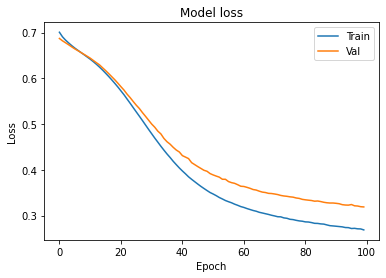

In [16]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
